In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [12]:
# Locations of radars with x, y, z coordinates
radars = {
    'A': [1, 1, 1],
    'B': [5, 5, 2]
}

# Initial location of intruder with x, y, z coordinates
intruder = [2, 2, 2]


In [11]:
def detect_intruder(radar_loc, intruder_loc, detection_radius=2):
    return np.sqrt((radar_loc[0] - intruder_loc[0])**2 + (radar_loc[1] - intruder_loc[1])**2 + (radar_loc[2] - intruder_loc[2])**2) <= detection_radius


In [13]:
# Define the intruder's path (e.g., moving diagonally up and to the right, and ascending)
intruder_path = [np.array(intruder) + np.array([i, i, i/2]) for i in range(10)]  # The intruder ascends at half the rate of x/y movement


In [14]:
output = []

for intruder_loc in intruder_path:
    detection = {}
    for name, radar_loc in radars.items():
        if detect_intruder(radar_loc, intruder_loc):
            detection[name] = list(intruder_loc.tolist())  # Convert numpy array to list
    output.append(detection)


In [27]:
output

[{'A': [2.0, 2.0, 2.0]},
 {},
 {'B': [4.0, 4.0, 3.0]},
 {'B': [5.0, 5.0, 3.5]},
 {},
 {},
 {},
 {},
 {},
 {}]

In [15]:
with open('radar_data.json', 'w') as f:
    json.dump(output, f)


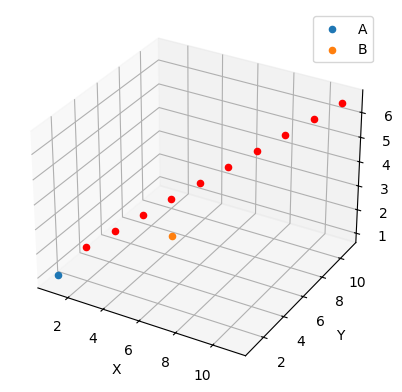

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the radars
for name, loc in radars.items():
    ax.scatter(*loc, label=name)

# Draw the intruder's path
for loc in intruder_path:
    ax.scatter(*loc, color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [20]:
# Convert the intruder path to a numpy array
intruder_path_np = np.array(intruder_path)

# Create a time array (assuming each step is 1 second)
time = np.array(range(len(intruder_path_np))).reshape(-1, 1)

# Split the intruder path into x, y, z coordinates
x = intruder_path_np[:, 0].reshape(-1, 1)
y = intruder_path_np[:, 1].reshape(-1, 1)
z = intruder_path_np[:, 2].reshape(-1, 1)


In [21]:
# Create and train a model for each coordinate
model_x = LinearRegression().fit(time, x)
model_y = LinearRegression().fit(time, y)
model_z = LinearRegression().fit(time, z)


In [22]:
# The future time point to predict
future_time = np.array([len(intruder_path_np) + 5]).reshape(-1, 1)

# Predict the future position
future_x = model_x.predict(future_time)
future_y = model_y.predict(future_time)
future_z = model_z.predict(future_time)

# The predicted future position of the intruder
future_position = (future_x[0][0], future_y[0][0], future_z[0][0])


C:\Users\sadhi\AppData\Local\Temp\ipykernel_9308\797345533.py:20: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  intruder_dot.set_data(intruder_path[num][0], intruder_path[num][1])


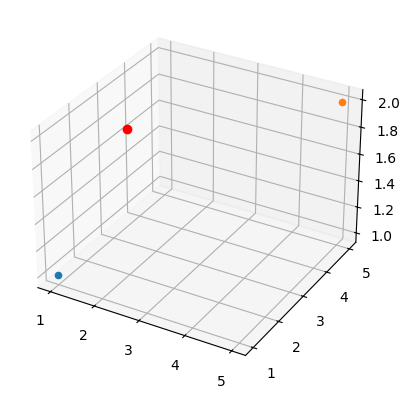

In [26]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw the radars
for name, loc in radars.items():
    ax.scatter(*loc, label=name)

# Initialize the intruder's path
intruder_dot, = ax.plot([], [], [], 'r')

# Update function for the animation
def update(num, intruder_path, intruder_dot):
    intruder_dot.set_data(intruder_path[num][0], intruder_path[num][1])
    intruder_dot.set_3d_properties(intruder_path[num][2])
    return intruder_dot,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(intruder_path)), fargs=(intruder_path, intruder_dot))

plt.show()
